In [1]:
import os
import numpy as np
from scipy.io import loadmat

directory = 'data'
    
# Define the fault widths and motor loads you are interested in
fault_widths = [18, 53]  # The fault widths in mm as specified
motor_loads = [0, 1, 2, 3]  # Motor loads as specified
fault_types = ['IR', 'Ball', 'OR_centred', 'OR_orthogonal', 'OR_opposite']
    
# Create a nested dictionary to hold the data
data = {18: {ml: {ft: None for ft in fault_types} for ml in motor_loads},
        53: {ml: {ft: None for ft in fault_types} for ml in motor_loads}}

# Mapping from file names to the specific fault width, motor load, and type
dataset_mapping = {
    '105': (18, 0, 'IR'), '106': (18, 1, 'IR'), '107': (18, 2, 'IR'), '108': (18, 3, 'IR'),
    '118': (18, 0, 'Ball'), '119': (18, 1, 'Ball'), '120': (18, 2, 'Ball'), '121': (18, 3, 'Ball'),
    '130': (18, 0, 'OR_centred'), '131': (18, 1, 'OR_centred'), '132': (18, 2, 'OR_centred'), '133': (18, 3, 'OR_centred'),
    '144': (18, 0, 'OR_orthogonal'), '145': (18, 1, 'OR_orthogonal'), '146': (18, 2, 'OR_orthogonal'), '147': (18, 3, 'OR_orthogonal'),
    '156': (18, 0, 'OR_opposite'), '158': (18, 1, 'OR_opposite'), '159': (18, 2, 'OR_opposite'), '160': (18, 3, 'OR_opposite'),
    '209': (53, 0, 'IR'), '210': (53, 1, 'IR'), '211': (53, 2, 'IR'), '212': (53, 3, 'IR'),
    '222': (53, 0, 'Ball'), '223': (53, 1, 'Ball'), '224': (53, 2, 'Ball'), '225': (53, 3, 'Ball'),
    '234': (53, 0, 'OR_centred'), '235': (53, 1, 'OR_centred'), '236': (53, 2, 'OR_centred'), '237': (53, 3, 'OR_centred'),
    '246': (53, 0, 'OR_orthogonal'), '247': (53, 1, 'OR_orthogonal'), '248': (53, 2, 'OR_orthogonal'), '249': (53, 3, 'OR_orthogonal'),
    '258': (53, 0, 'OR_opposite'), '259': (53, 1, 'OR_opposite'), '260': (53, 2, 'OR_opposite'), '261': (53, 3, 'OR_opposite'),
}

# Iterate over files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.mat'):
        file_id = filename.split('.')[0]
        if file_id in dataset_mapping:
            # Load the .mat file
            mat_data = loadmat(os.path.join(directory, filename))
            width, load, fault_type = dataset_mapping[file_id]
            
            # Extract the data for DE, FE, BA channels and form an array of shape (n, 3)
            de_time = mat_data[f'X{file_id}_DE_time'].flatten()
            fe_time = mat_data[f'X{file_id}_FE_time'].flatten()
            ba_time = mat_data[f'X{file_id}_BA_time'].flatten()
            combined_data = np.stack((de_time, fe_time, ba_time), axis=-1)
            
            # Store the data in the dictionary
            data[width][load][fault_type] = combined_data

# Print number of samples for each fault width, motor load, and type
for width in fault_widths:
    for load in motor_loads:
        for fault_type in fault_types:
            print(f'Width: {width}, Load: {load}, Type: {fault_type}, Samples: {data[width][load][fault_type].shape}')
        print()
    print()


Width: 18, Load: 0, Type: IR, Samples: (121265, 3)
Width: 18, Load: 0, Type: Ball, Samples: (122571, 3)
Width: 18, Load: 0, Type: OR_centred, Samples: (121991, 3)
Width: 18, Load: 0, Type: OR_orthogonal, Samples: (122281, 3)
Width: 18, Load: 0, Type: OR_opposite, Samples: (122281, 3)

Width: 18, Load: 1, Type: IR, Samples: (121991, 3)
Width: 18, Load: 1, Type: Ball, Samples: (121410, 3)
Width: 18, Load: 1, Type: OR_centred, Samples: (122426, 3)
Width: 18, Load: 1, Type: OR_orthogonal, Samples: (121846, 3)
Width: 18, Load: 1, Type: OR_opposite, Samples: (121991, 3)

Width: 18, Load: 2, Type: IR, Samples: (122136, 3)
Width: 18, Load: 2, Type: Ball, Samples: (121556, 3)
Width: 18, Load: 2, Type: OR_centred, Samples: (121410, 3)
Width: 18, Load: 2, Type: OR_orthogonal, Samples: (121556, 3)
Width: 18, Load: 2, Type: OR_opposite, Samples: (122281, 3)

Width: 18, Load: 3, Type: IR, Samples: (122917, 3)
Width: 18, Load: 3, Type: Ball, Samples: (121556, 3)
Width: 18, Load: 3, Type: OR_centred, 

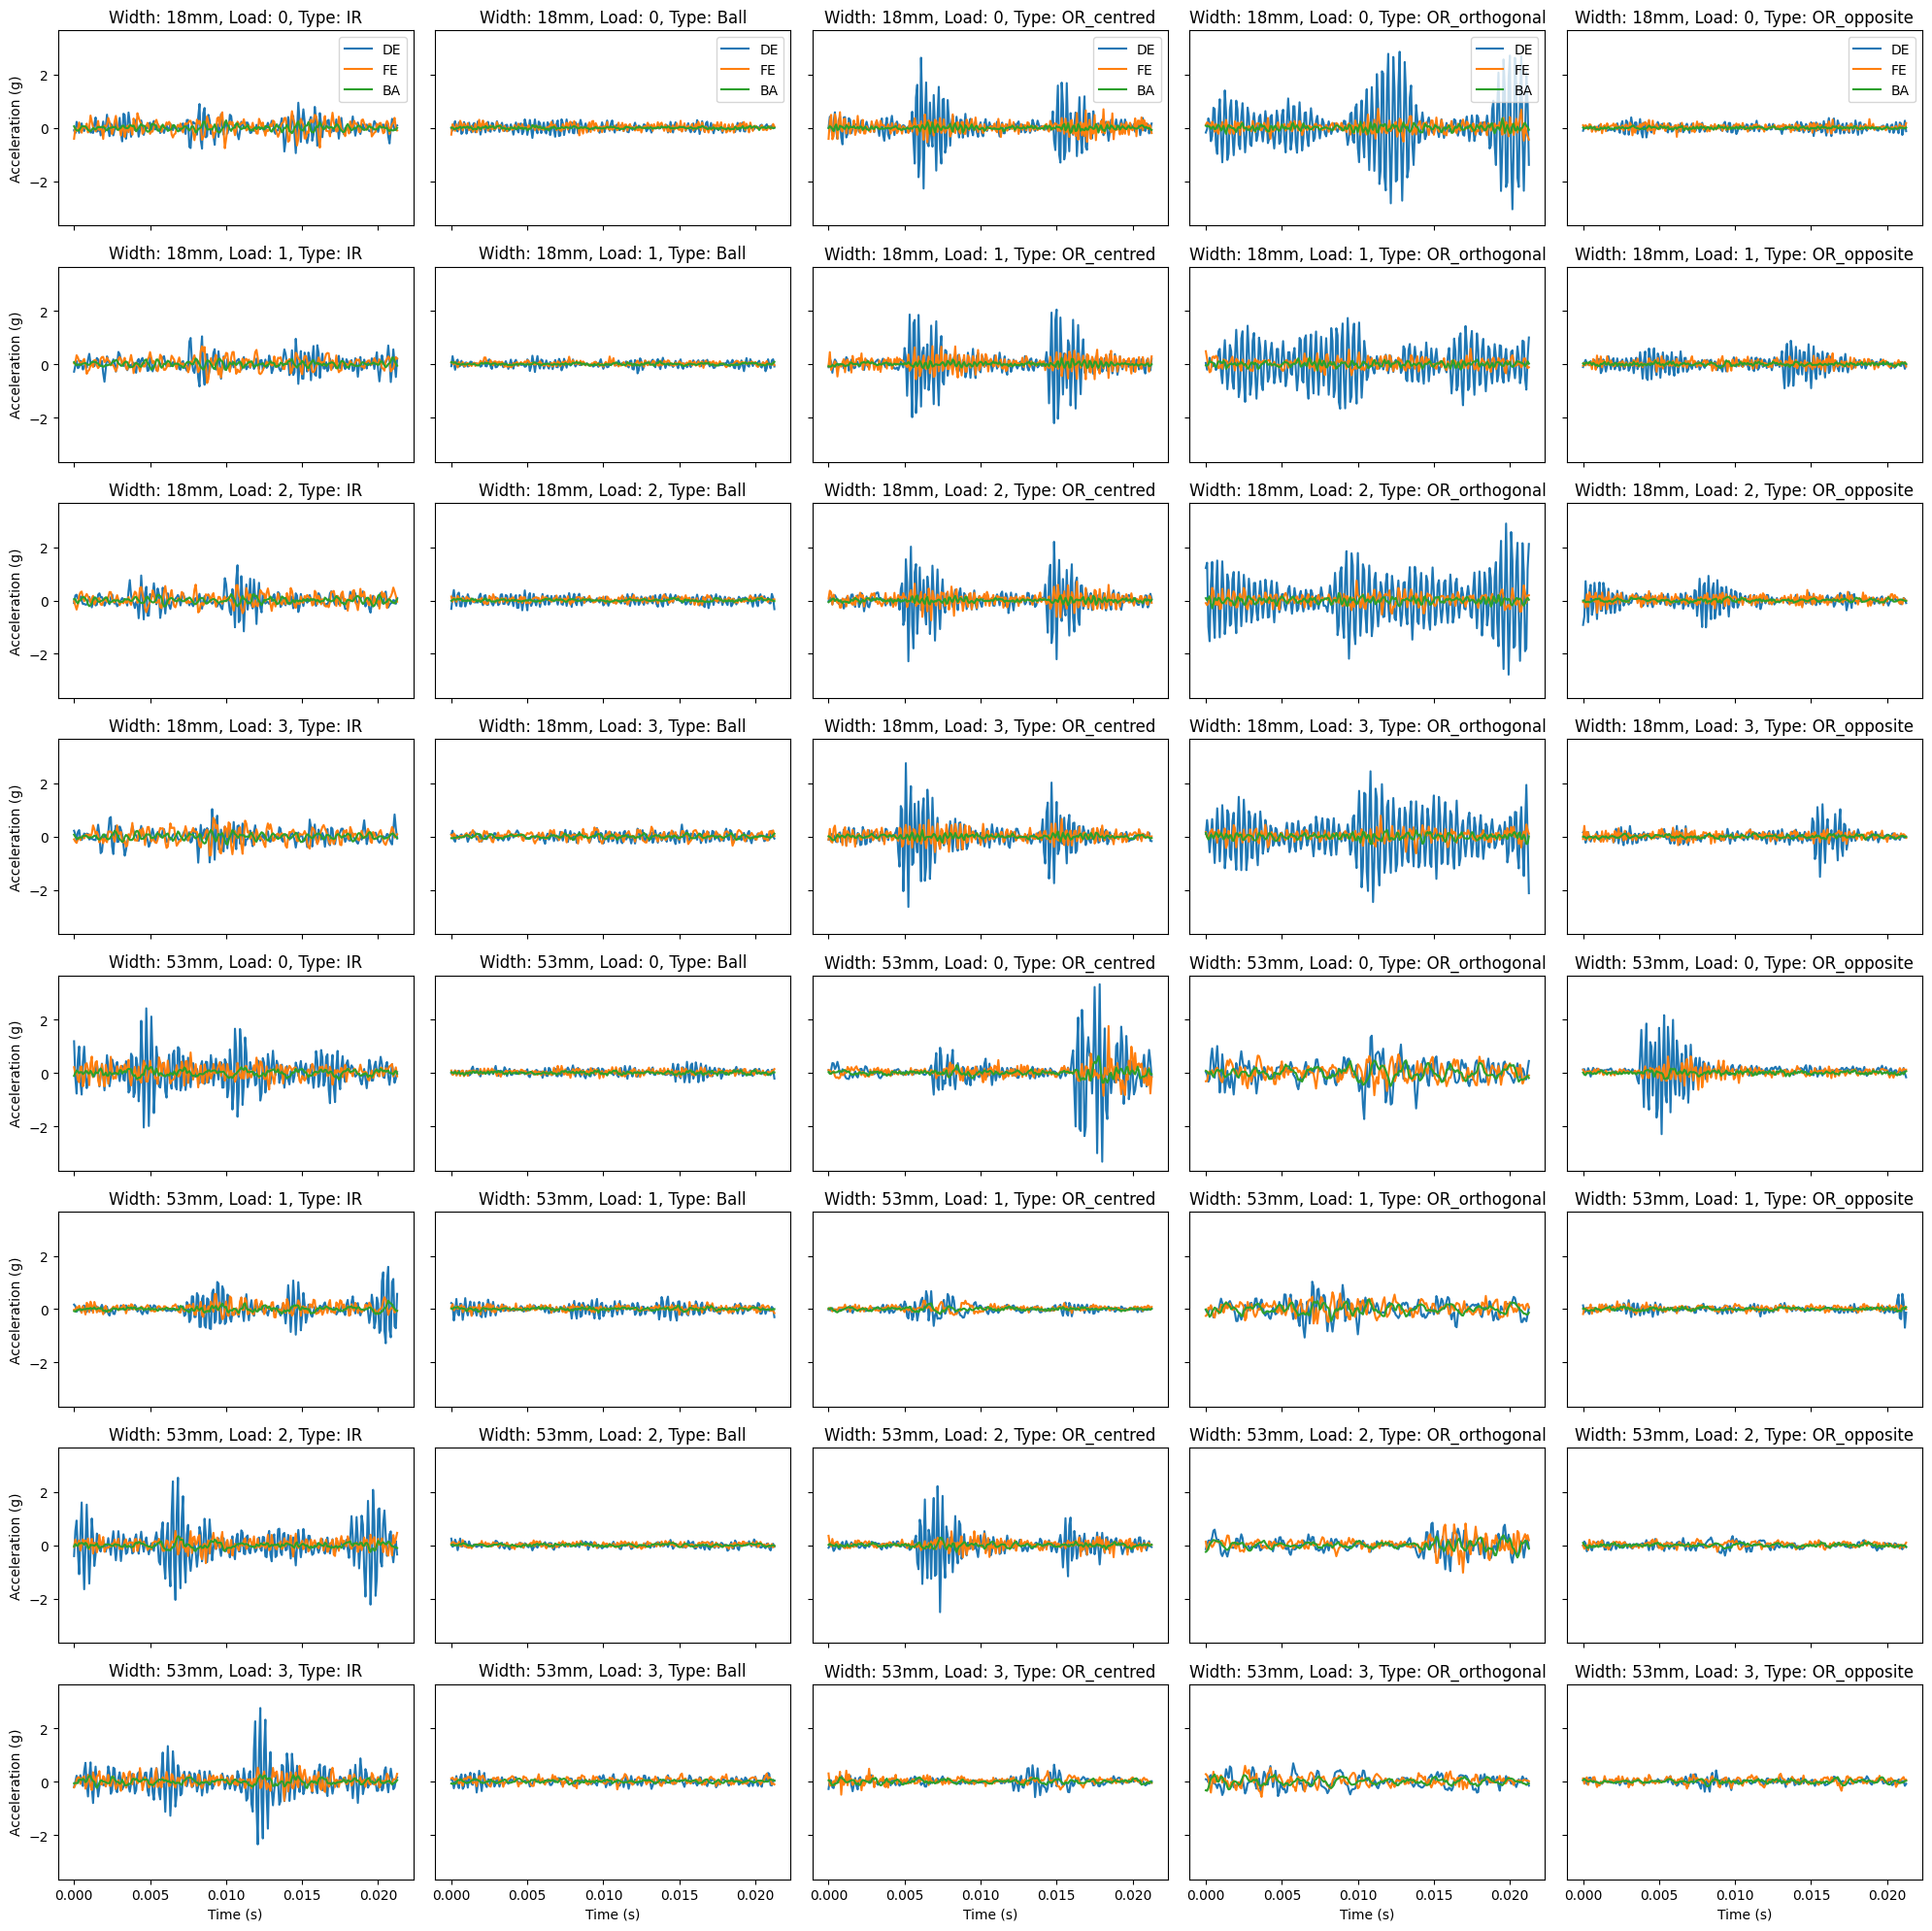

In [2]:
import matplotlib.pyplot as plt

# Set the dimensions of the plot grid
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(20, 20), sharex=True, sharey=True)

# Define the fault widths and motor loads as per your structure
fault_widths = [18, 53]  # in mm
motor_loads = [0, 1, 2, 3]  # motor loads
fault_types = ['IR', 'Ball', 'OR_centred', 'OR_orthogonal', 'OR_opposite']

# Loop through the rows and columns of the subplot
for i_idx, width in enumerate(fault_widths):
    for j_idx, load in enumerate(motor_loads):
        for k_idx, fault_type in enumerate(fault_types):
            ax = axes[4*i_idx + j_idx, k_idx]  # Calculate the correct subplot position
            if data[width][load][fault_type] is not None:
                ts = data[width][load][fault_type]
                ts = ts[:256]

                # Convert time to seconds (fs = 12 kHz)
                time = np.arange(ts.shape[0]) / 12000

                # Plot each channel
                ax.plot(time, ts[:, 0], label='DE')
                ax.plot(time, ts[:, 1], label='FE')
                ax.plot(time, ts[:, 2], label='BA')
                ax.set_title(f'Width: {width}mm, Load: {load}, Type: {fault_type}')
            else:
                ax.text(0.5, 0.5, 'Data Not Available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

            # Set labels and legends only for the first subplot for cleanliness
            if i_idx == 0 and j_idx == 0:
                ax.legend(loc='upper right')

            # Labels only on the edge subplots
            if i_idx == 1 and j_idx == 3:  # last row
                ax.set_xlabel('Time (s)')
            if k_idx == 0:  # first column
                ax.set_ylabel('Acceleration (g)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [3]:
import numpy as np

# Dictionary structure setup (assuming 'data' is already filled)
fault_widths = [18, 53]  # Fault widths in mm
motor_loads = [0, 1, 2, 3]  # Motor loads
fault_types = ['IR', 'Ball', 'OR_centred', 'OR_orthogonal', 'OR_opposite']
fault_type_dict = {ft: i for i, ft in enumerate(fault_types)}  # Map fault types to integers

# Parameters for the subseries
subseries_length = 256

# Lists to collect the data
x_list = []
w_list = []
m_list = []
y_list = []

# Loop over the data and process it
for width in fault_widths:
    width_index = 0 if width == 18 else 1  # Mapping widths to 0 and 1
    for load in motor_loads:
        for fault_type in fault_types:
            series = data[width][load][fault_type]
            # Calculate the number of complete subseries in the current time series
            num_subseries = series.shape[0] // subseries_length
            
            # Reshape the data into subseries of the specified length, discarding incomplete final part
            reshaped_series = series[:num_subseries * subseries_length].reshape(num_subseries, subseries_length, 3)
            
            # Append data to the lists
            x_list.append(reshaped_series)
            w_list.extend([width_index] * reshaped_series.shape[0])
            m_list.extend([load] * reshaped_series.shape[0])
            y_list.extend([fault_type_dict[fault_type]] * reshaped_series.shape[0])

# Concatenate lists into numpy arrays
x = np.concatenate(x_list, axis=0).transpose(0, 2, 1)
w = np.array(w_list)
m = np.array(m_list)
y = np.array(y_list)

# Define k, storing w-m combinations
k = 4 * w + m

print(f'x shape: {x.shape}, w shape: {w.shape}, m shape: {m.shape}, y shape: {y.shape}, k shape: {k.shape}')


x shape: (19048, 3, 256), w shape: (19048,), m shape: (19048,), y shape: (19048,), k shape: (19048,)


In [4]:
# Print number of samples for each fault width
for width in fault_widths:
    print(f'Width: {width}, Samples: {sum(w == (0 if width == 18 else 1))}')
print()
# Print number of samples for each motor load
for load in motor_loads:
    print(f'Load: {load}, Samples: {sum(m == load)}')
print()
# Print number of samples for each fault type
for fault_type in fault_types:
    print(f'Type: {fault_type}, Samples: {sum(y == fault_type_dict[fault_type])}')

Width: 18, Samples: 9522
Width: 53, Samples: 9526

Load: 0, Samples: 4762
Load: 1, Samples: 4758
Load: 2, Samples: 4761
Load: 3, Samples: 4767

Type: IR, Samples: 3808
Type: Ball, Samples: 3805
Type: OR_centred, Samples: 3813
Type: OR_orthogonal, Samples: 3808
Type: OR_opposite, Samples: 3814


In [5]:
# Print number of samples for each fault width and type
for width in fault_widths:
    for fault_type in fault_types:
        print(f'Width: {width}, Type: {fault_type}, Samples: {sum((w == (0 if width == 18 else 1)) & (y == fault_type_dict[fault_type]))}')
    print()

Width: 18, Type: IR, Samples: 1906
Width: 18, Type: Ball, Samples: 1900
Width: 18, Type: OR_centred, Samples: 1906
Width: 18, Type: OR_orthogonal, Samples: 1903
Width: 18, Type: OR_opposite, Samples: 1907

Width: 53, Type: IR, Samples: 1902
Width: 53, Type: Ball, Samples: 1905
Width: 53, Type: OR_centred, Samples: 1907
Width: 53, Type: OR_orthogonal, Samples: 1905
Width: 53, Type: OR_opposite, Samples: 1907



In [6]:
# Print number of samples for each fault width, motor load, and type
for width in fault_widths:
    for load in motor_loads:
        for fault_type in fault_types:
            print(f'Width: {width}, Load: {load}, Type: {fault_type}, Samples: {sum((w == (0 if width == 18 else 1)) & (m == load) & (y == fault_type_dict[fault_type]))}')
        print()
    print()

Width: 18, Load: 0, Type: IR, Samples: 473
Width: 18, Load: 0, Type: Ball, Samples: 478
Width: 18, Load: 0, Type: OR_centred, Samples: 476
Width: 18, Load: 0, Type: OR_orthogonal, Samples: 477
Width: 18, Load: 0, Type: OR_opposite, Samples: 477

Width: 18, Load: 1, Type: IR, Samples: 476
Width: 18, Load: 1, Type: Ball, Samples: 474
Width: 18, Load: 1, Type: OR_centred, Samples: 478
Width: 18, Load: 1, Type: OR_orthogonal, Samples: 475
Width: 18, Load: 1, Type: OR_opposite, Samples: 476

Width: 18, Load: 2, Type: IR, Samples: 477
Width: 18, Load: 2, Type: Ball, Samples: 474
Width: 18, Load: 2, Type: OR_centred, Samples: 474
Width: 18, Load: 2, Type: OR_orthogonal, Samples: 474
Width: 18, Load: 2, Type: OR_opposite, Samples: 477

Width: 18, Load: 3, Type: IR, Samples: 480
Width: 18, Load: 3, Type: Ball, Samples: 474
Width: 18, Load: 3, Type: OR_centred, Samples: 478
Width: 18, Load: 3, Type: OR_orthogonal, Samples: 477
Width: 18, Load: 3, Type: OR_opposite, Samples: 477


Width: 53, Load

In [7]:
# Normalize the data between 0 and 1
x_min = x.min()
x_max = x.max()
print(f'Min: {x_min:.4f}, Max: {x_max:.4f}')

x = (x - x_min) / (x_max - x_min)

Min: -6.6533, Max: 6.6529


In [8]:
import numpy as np
import random

# Ensure reproducibility
random.seed(0)
np.random.seed(0)

# Initialize fs vector with zeros
fs = np.zeros_like(w)

# Iterate through each unique combination of fault width, motor load, and fault type
for width in fault_widths:
    for load in motor_loads:
        for fault_type in fault_types:
            # Get the corresponding fault type value
            fault_type_value = fault_type_dict[fault_type]

            # Find indices matching the current combination
            indices = np.where((w == (0 if width == 18 else 1)) & (m == load) & (y == fault_type_value))[0]

            # If there are at least 5 samples, randomly select 5
            if len(indices) >= 5:
                selected_indices = np.random.choice(indices, 5, replace=False)
                fs[selected_indices] = 1

# Verify the result
print("Number of 1s in fs:", np.sum(fs))


Number of 1s in fs: 200


In [9]:
import pickle

# Save the data to a pickle file
with open('data/cwru_256_3ch_5cl.pkl', 'wb') as f:
    pickle.dump((x, y, k), f)

# Save the few-shot vector to a pickle file
with open('data/cwru_256_3ch_5cl_fs.pkl', 'wb') as f:
    pickle.dump(fs, f)